In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('./Train.csv')
X_test = pd.read_csv('./Test.csv')
sample = pd.read_csv('./Sample_Submission.csv')

In [3]:
train_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [8]:
train_data.shape

(1600, 6)

In [4]:
X_test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925


In [9]:
X_train = train_data.values[:,:-1]
y_train = train_data.values[:,-1]

In [10]:
X_train.shape,y_train.shape

((1600, 5), (1600,))

In [11]:
df = pd.DataFrame(X_train)

In [12]:
df.describe()

,0,1,2,3,4
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.004114,-0.027604,-0.044459,-0.042408,0.012005
std,0.997338,1.021776,1.011768,1.017189,0.978654
min,-3.380125,-3.314844,-3.153118,-3.250169,-2.851707
25%,-0.647165,-0.705030,-0.706385,-0.709504,-0.615880
50%,-0.000360,-0.043769,-0.041272,-0.029756,-0.013527
75%,0.682118,0.645442,0.639130,0.646290,0.650089
max,3.287205,3.438895,3.216176,2.985410,3.321770


In [23]:
ones = np.ones((X_train.shape[0],1))
ones.shape

X_train = np.hstack((ones,X_train))

In [26]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5
0,1.0,0.293416,-0.945599,-0.421105,0.406816,0.525662
1,1.0,-0.836084,-0.189228,-0.776403,-1.053831,0.597997
2,1.0,0.236425,0.132836,-0.147723,0.699854,-0.187364
3,1.0,0.175312,0.143194,-0.581111,-0.122107,-1.292168
4,1.0,-1.693011,0.542712,-2.798729,-0.686723,1.244077


In [16]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    error = 0.0
    y_ = hypothesis(X,theta)
    error += np.sum((y_- y)**2)  #y_ and y are both column taking sum of all errors
    m = X.shape[0]
    return error/m

def gradient(X,y,theta):
    m = X.shape[0]
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_-y))
    
    return grad/m

def gradientDescent(X,y,learning_rate=0.1,max_steps=300):
    n = X.shape[1]
    theta = np.zeros(n)
    error_list = []
    for i in range(max_steps):
        e = error(X,y,theta)
        error_list.append(e)
        
        grad = gradient(X,y,theta)
        
        theta = theta - learning_rate*grad
    return theta,error_list

In [27]:
theta,error_list = gradientDescent(X_train,y_train)

In [28]:
theta

array([ 4.99096674, 29.68187118, 92.66247759,  8.28062089, 44.76773522,
        2.51916121])

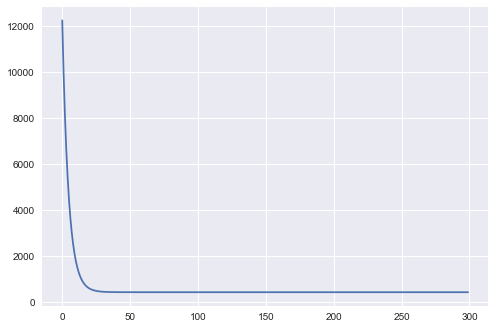

In [32]:
plt.style.use('seaborn')
plt.plot(error_list)
plt.show()

In [34]:
y_ = hypothesis(X_train,theta)

In [36]:
def r2_score(y_,y):
    num = np.sum((y - y_)**2)
    denom = np.sum((y - y_.mean())**2)
    score = 1 - num/denom
    
    return score*100

In [37]:
r2_score(y_,y_train)

96.60939669975616

## Doing Prediction

In [39]:
ones = np.ones((X_test.shape[0],1))
X_test = np.hstack((ones,X_test))

X_test.shape

(400, 6)

In [40]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5
0,1.0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,1.0,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,1.0,-1.024452,0.962991,-0.407942,-1.861274,0.455201
3,1.0,-2.489841,0.544802,0.601219,-0.607021,-1.314286
4,1.0,-0.384675,-0.833624,1.358552,-0.547932,0.411925


In [41]:
pred = hypothesis(X_test,theta)

In [42]:
sample.head()

,Id,target
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


In [56]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      400 non-null    int64
 1   target  400 non-null    int64
dtypes: int64(2)
memory usage: 6.4 KB


In [71]:
pred_df = pd.DataFrame(pred,columns=['target'],dtype='int64')

In [74]:
pred_df['Id'] = np.arange(len(pred_df),dtype='int64')

In [75]:
pred_df.head()

,target,Id
0,114,0
1,118,1
2,-21,2
3,-43,3
4,-95,4


In [76]:
pred_df = pred_df.reindex(columns=['Id','target'])

In [80]:
pred_df.head()

,Id,target
0,0,114
1,1,118
2,2,-21
3,3,-43
4,4,-95


In [77]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Id      400 non-null    int64
 1   target  400 non-null    int64
dtypes: int64(2)
memory usage: 6.4 KB


In [78]:
pred_df.to_csv('prediction.csv',index=False)

In [79]:
subm = pd.read_csv('./prediction.csv')
subm.head()

,Id,target
0,0,114
1,1,118
2,2,-21
3,3,-43
4,4,-95
